<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-03/hmim-tfsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 85 (delta 31), reused 18 (delta 3), pack-reused 0
Receiving objects: 100% (85/85), 2.09 MiB | 7.90 MiB/s, done.
Resolving deltas: 100% (31/31), done.


'/content'

# 24-05-23 Electrolysis of pure water

- Scan: linear dual
- Start: -3V
- Stop: 3V
(We would have been switching cathode and anode)
- No. of points: 100

No electrolysis occurred due to lack of EDL. However, solution turned yellow a tiny bit (shown below).


# Base Time
05/23/2024 09:57:03.867998320

In [3]:
%cd "/content/gator/data/06-03"

/content/gator/data/06-03


In [13]:
df = pd.read_csv('0603.csv')

In [14]:
with open(f'0603.csv')as f:
  print(f.readline())


Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,Terminal,Questionable,Origin,Value,Unit,Digits,Output,Sense,Source Limit,Overtemp,Relative Time



In [15]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading'] * 1e3

# Potential (mV)
V = df['Value'] * 1e3

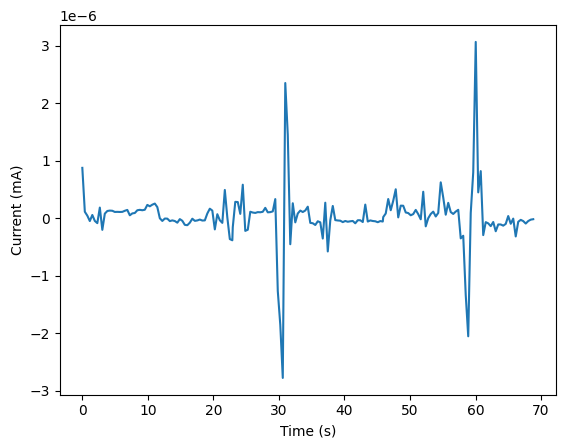

In [26]:
# prompt: 生成I和时间图像

plt.plot(T, I)
plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.show()


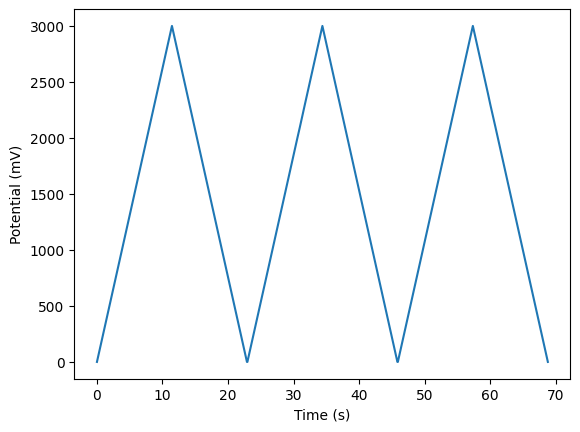

In [27]:
# prompt: 生成V和时间的图像

plt.plot(T, V)
plt.xlabel('Time (s)')
plt.ylabel('Potential (mV)')
plt.show()


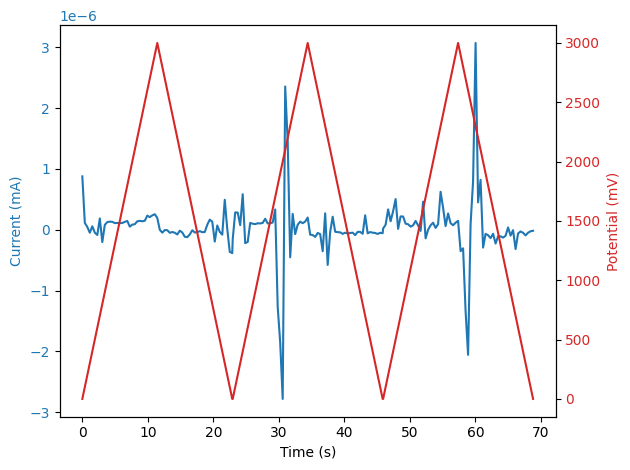

In [30]:
# prompt: 在同一张图里生成IV和T的图像

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Current (mA)', color=color)
ax1.plot(T, I, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Potential (mV)', color=color)  # we already handled the x-label with ax1
ax2.plot(T, V, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
